In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


Tensorflow version 2.2.0
Running on TPU  ['10.98.94.10:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.98.94.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.98.94.10:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
#unzipping the images into local drive. 
!unzip '/content/drive/My Drive/Colab Notebooks/cnn_assignment_DL/Dataset.zip'


Archive:  /content/drive/My Drive/Colab Notebooks/cnn_assignment_DL/Dataset.zip
replace Dataset/train/category 4_original_C030.png_8a5e02ba-8431-48e7-80d0-6aed73c26c3c.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/train/category 4_original_C030.png_8a5e02ba-8431-48e7-80d0-6aed73c26c3c.png  
  inflating: Dataset/train/category 4_original_C040.png_46defe44-d6f3-4681-a224-3376990ce6ff.png  
  inflating: Dataset/train/category 3_original_4041.png_8f585346-2cea-4cff-95fc-06d8c481ea2c.png  
  inflating: Dataset/train/category 4_original_C024.png_e3fbf0ea-d214-4f5a-adae-6f033af06f0a.png  
  inflating: Dataset/train/category 3_original_4013.png_7abf6582-116f-401b-8c1b-ff7e61c05c76.png  
  inflating: Dataset/train/category 2_original_6011.png_ab406767-2e83-4f10-b113-e9b11f2fb6b1.png  
  inflating: Dataset/train/category 4_original_C041.png_6dc9e80b-f6f3-437f-a4be-de58a36e755c.png  
  inflating: Dataset/train/category 2_original_6031.png_b8e2d05b-08c7-4afa-8d21-b3b5b3b0fd62.p

In [3]:
#priting the sizes of the train and test Images.
import os
train_nb = len(os.listdir('/content/Dataset/train'))
test_nb = len(os.listdir('/content/Dataset/test'))
print("Size of the training Data: ",train_nb)
print("Size of the testing Data: ",test_nb)

Size of the training Data:  440
Size of the testing Data:  30


In [4]:
#Importing the images Id's and its categories. 
#One-Hot Encoding of the target labels --> y(target label). 

import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#creating the LabelEncoder Object. 
le = LabelEncoder()

train = pd.read_csv('/content/Dataset/labelling.csv')
y = train['label']

print(train.iloc[[0]], train.iloc[[109]], train.iloc[[310]], train.iloc[[420]], sep='\n')
print("\nNumerical labelling: ")
y = le.fit_transform(y.values)

print('\nAfter One-hot Encoding of the test images : ')
y = to_categorical(y, num_classes=4)
print(y[0],y[109],y[310],y[420], sep = '\n')

Using TensorFlow backend.


                                                  ID label
0  category 1_original_1050.png_3a392001-cb65-4e2...     A
                                                    ID label
109  category 4_original_C041.png_6dc9e80b-f6f3-437...     B
                                                    ID label
310  category 2_original_6025.png_ad20bc5e-d157-492...     C
                                                    ID label
420  category 3_original_4023.png_c527e335-6bc6-482...     D

Numerical labelling: 

After One-hot Encoding of the test images : 
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


# NOTE:
Label A is labelled with the numerical value 0
Label B is labelled with the numerical value 1
Label C is labelled with the numerical value 2
Label D is labelled with the numerical value 3

In [5]:
def augment_data(dataset, dataset_labels, augementation_factor=4, use_random_shear =True ,use_random_rotation=True, use_random_zoom=True):

	'''Used to increase the number of images by varying the rotation and zooming 
		 of the given image.

	Arguments:
		dataset(float): A numpy array of the images 
		dataset_labels: A numpy array of the target labels for the images.
		augmentation_factor (int): Number to specify how many times variances should
		be applied.  
		use_random_shear(Boolean): Shearing of the image in various angles.
		use_random_rotation(Boolean):Whether to use the rotation factor to increase 
		the number of images.
		use_random_zoom(Boolean): Whether to use the zooming factor to increase the 
		number of images.
	
	Returns:
		numpy array of the increased number of images and numpy array of their 
		labels.

	'''


	augmented_image = []
	augmented_image_labels = []

	for num in range (0, dataset.shape[0]):

		for i in range(0, augementation_factor):
			# original image:
			augmented_image.append(dataset[num])
			augmented_image_labels.append(dataset_labels[num])

			if use_random_rotation:
				augmented_image.append(tf.keras.preprocessing.image.random_rotation(\
						dataset[num], 80, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])
		
				augmented_image.append(tf.keras.preprocessing.image.random_rotation(\
				    dataset[num], 10, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])
		
				
				augmented_image.append(tf.keras.preprocessing.image.random_rotation(\
				    dataset[num], 60, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

				augmented_image.append(tf.keras.preprocessing.image.random_rotation(
				    dataset[num], 70, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])
		
			if use_random_shear:
					augmented_image.append(tf.keras.preprocessing.image
					                       .random_shear(dataset[num], 0.2, row_axis=0,
																	col_axis=1, channel_axis=2))
					augmented_image_labels.append(dataset_labels[num])
			
					augmented_image.append(tf.keras.preprocessing.image
																.random_shear(dataset[num], 0.4, row_axis=0, 
																	col_axis=1, channel_axis=2))
					augmented_image_labels.append(dataset_labels[num])

					augmented_image.append(tf.keras.preprocessing.image
																.random_shear(dataset[num], 0.6, row_axis=0, 
																	col_axis=1, channel_axis=2))
					augmented_image_labels.append(dataset_labels[num])

			
			
			if use_random_zoom:
				augmented_image.append(tf.keras.preprocessing.image.random_zoom(\
				     dataset[num], [-0.7, -0.7], row_axis=1, col_axis=2, channel_axis=0,\
						 fill_mode='nearest',cval=0.0, interpolation_order=1))
				augmented_image_labels.append(dataset_labels[num])
				augmented_image.append(tf.keras.preprocessing.image.random_zoom(\
				    dataset[num], [-0.6, -0.6], row_axis=1, col_axis=2, channel_axis=0,\
						fill_mode='nearest',cval=0.0, interpolation_order=1))
				augmented_image_labels.append(dataset_labels[num])
		
				augmented_image.append(tf.keras.preprocessing.image.random_zoom(\
				     dataset[num], [-0.5, -0.5], row_axis=1, col_axis=2, channel_axis=0,\
						 fill_mode='nearest',cval=0.0, interpolation_order=1))
				augmented_image_labels.append(dataset_labels[num])
				augmented_image.append(tf.keras.preprocessing.image.random_zoom(\
				    dataset[num], [-0.4, -0.4], row_axis=1, col_axis=2, channel_axis=0,\
						fill_mode='nearest',cval=0.0, interpolation_order=1))
				augmented_image_labels.append(dataset_labels[num])

				augmented_image.append(tf.keras.preprocessing.image.random_zoom(\
				    dataset[num], [-0.3, -0.3], row_axis=1, col_axis=2, channel_axis=0,\
						fill_mode='nearest',cval=0.0, interpolation_order=1))
				augmented_image_labels.append(dataset_labels[num])

				augmented_image.append(tf.keras.preprocessing.image.random_zoom(\
				     dataset[num], [-0.2, -0.2], row_axis=1,col_axis=2,channel_axis=0,\
						 fill_mode='nearest',cval=0.0, interpolation_order=1))
				augmented_image_labels.append(dataset_labels[num])

	return np.array(augmented_image), np.array(augmented_image_labels)

In [6]:
import matplotlib.pyplot as plt



plt.style.use('seaborn')
def plt_dynamic(x, va, tra, ax):
  '''
  Used to plot the Validation and Training Accuracy.
  
  Arguments:
    x(list):Number of Epochs.
    va(list): Values of Validation Accuracy.
    tra(list):Values of Training Accuracy.
    ax(object)
  
  Returns:
    plotting of the given Data. 
  '''
  ax.plot(x, va, 'r--', label="Validation Accuracy")
  ax.plot(x, tra, 'b*-', label="Training Accuracy")
  plt.legend()
  plt.show()


In [7]:
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np

# Assigning the values to the image width and height.
w, h = 32, 32 

#getting the location of list of images 
train_img_list = os.listdir('/content/Dataset/train')

#conversion of all the images into numpy  arrays.
# We have grayscale images, So we will keep color_mode = 'grayscale'.
train_image = []
for i in train_img_list:
  img = image.load_img('/content/Dataset/train/'+i, target_size=(w,h,1), 
                       color_mode="grayscale")
  img = image.img_to_array(img)
  train_image.append(img)
X = np.array(train_image)

X.shape

(440, 32, 32, 1)

In [8]:
#Data  augmentation.
X, y = augment_data(X,y)
print(X.shape)

(24640, 32, 32, 1)


In [9]:
#normalizing the Data
X /= 255
print(X.shape)

(24640, 32, 32, 1)


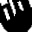

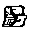

In [10]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[100]*255)
cv2_imshow(X[1000]*255)


In [11]:
#splitting the dataset into training and testing Dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep = '\t')

(19712, 32, 32, 1)	(4928, 32, 32, 1)	(19712, 4)	(4928, 4)


In [12]:
#getting the list of the test images
test_img_list = os.listdir('/content/Dataset/test')
len(test_img_list)

30

In [13]:
#conversion of test images into numpy arrays

label = open('/content/Dataset/results.csv', 'w')

label.write('image_id,predicted_labels\n')

test_image = []
for i in test_img_list:
  img_id = str(i)
  img = image.load_img('/content/Dataset/test/'+img_id, target_size=(w,h,1),
                       color_mode='grayscale')
  label.write(img_id+'\n') 
  img = image.img_to_array(img)
  img = img/255
  test_image.append(img)
test = np.array(test_image)
label.close()


Train on 19712 samples, validate on 4928 samples
Epoch 1/250
19712/19712 [==============================] - 7s 377us/step - loss: 76.6109 - accuracy: 0.2931 - val_loss: 49.0554 - val_accuracy: 0.2833
Epoch 2/250
19712/19712 [==============================] - 7s 345us/step - loss: 38.8529 - accuracy: 0.3355 - val_loss: 30.9550 - val_accuracy: 0.2620
Epoch 3/250
19712/19712 [==============================] - 7s 345us/step - loss: 25.7736 - accuracy: 0.3884 - val_loss: 21.2242 - val_accuracy: 0.2380
Epoch 4/250
19712/19712 [==============================] - 7s 341us/step - loss: 17.5672 - accuracy: 0.4406 - val_loss: 14.5495 - val_accuracy: 0.2474
Epoch 5/250
19712/19712 [==============================] - 7s 337us/step - loss: 11.9027 - accuracy: 0.4829 - val_loss: 9.9517 - val_accuracy: 0.2490
Epoch 6/250
19712/19712 [==============================] - 7s 339us/step - loss: 8.0151 - accuracy: 0.5251 - val_loss: 6.6808 - val_accuracy: 0.4450
Epoch 7/250
19712/19712 [=======================

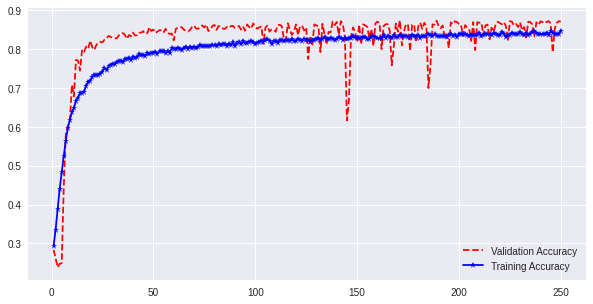

In [14]:
#Model building and training

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import keras

Epochs = 250
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(w,h,1), 
                 kernel_regularizer= tf.keras.regularizers.l2(0.9),
                 kernel_initializer='he_uniform'))
model.add(Dropout(0.4))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 kernel_regularizer= tf.keras.regularizers.l2(0.9), 
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())


model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size =200, epochs=Epochs, 
                    validation_data=(X_test, y_test), verbose = True)

score = model.evaluate(X_test, y_test)

#prining the Validation loss and Validation accuracy.
print("Test loss: ", score[0])
print("Test Accuracy: ", score[1])

#plotting the results. 
fig, ax = plt.subplots(figsize = (10,5))
x = list(range(1, Epochs+1))

va = history.history['val_accuracy'] 
tra = history.history['accuracy']
plt_dynamic(x, va, tra, ax)
plt.show()


#observations :
1. We obtained the good model whose accuracy is 87%.
2. Model is not overfitting which is shown in the above plotting of the results. 

In [15]:
#prediction of the output.
prediction = list(model.predict_classes(test))


In [16]:
# creating submission file
sample = pd.read_csv('/content/Dataset/results.csv')

sample['predicted_labels'] = prediction
sample.to_csv('predictions.csv', header=True, index=False)
